In [1]:
! .././ns3 run project.cc  -- --transportProtocol=ns3::TcpLinuxReno

[  0%] Building CXX object scratch/CMakeFiles/scratch_project.dir/project.cc.o
[  0%] Linking CXX executable "/Users/maganthseetharaman/Desktop/ICS 234/ns-3-dev/build/scratch/ns3-dev-project-default"


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
RESULTS_DIR = '../results/flow_stats.csv'

In [4]:
data = pd.read_csv(RESULTS_DIR)
data

,Flow ID,Time,Throughput,Packets Dropped,Fairness,Window Size
0,0,0.501,0.001725,0,0.496482,1
1,1,0.501,0.010731,0,0.496482,1
2,2,0.501,0.011114,0,0.496482,1
3,0,0.506,0.001708,0,0.496482,1
4,1,0.506,0.010625,0,0.496482,1
...,...,...,...,...,...,...
359695,1,599.991,0.004836,58,0.379836,70
359696,2,599.991,0.003984,64,0.379836,70
359697,0,599.996,0.022150,109,0.379836,70
359698,1,599.996,0.004836,58,0.379836,70


In [5]:
def generate_subplot(ax: list[plt.Axes], flow_id: int, time: list[object], data: list[object], color: str, label: str, offset: int, loglog: bool):
    ax.append(ax[0].twinx())
    ax[-1].plot(time, data, label=f'Flow ID: {flow_id}', color=color)
    ax[-1].set_ylabel(label, color=color)
    ax[-1].tick_params('y', colors=color)
    ax[-1].spines['right'].set_position(('outward', offset))
    if loglog:
        ax[-1].set_yscale('log')
        ax[-1].set_xscale('log')

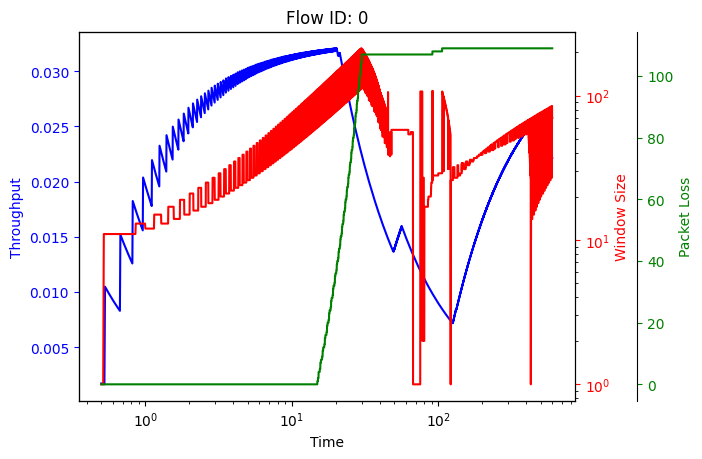

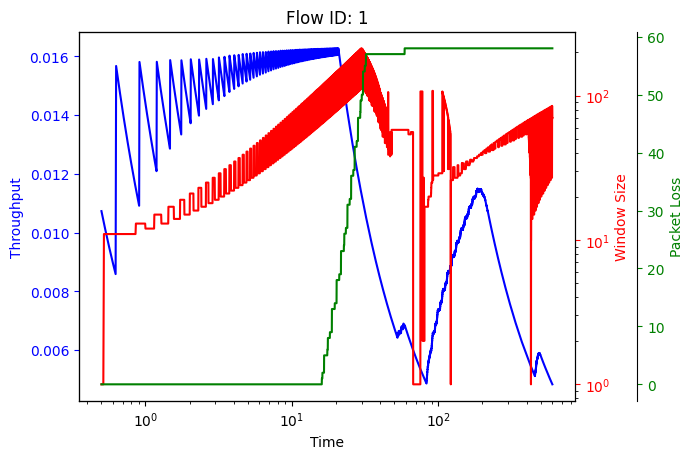

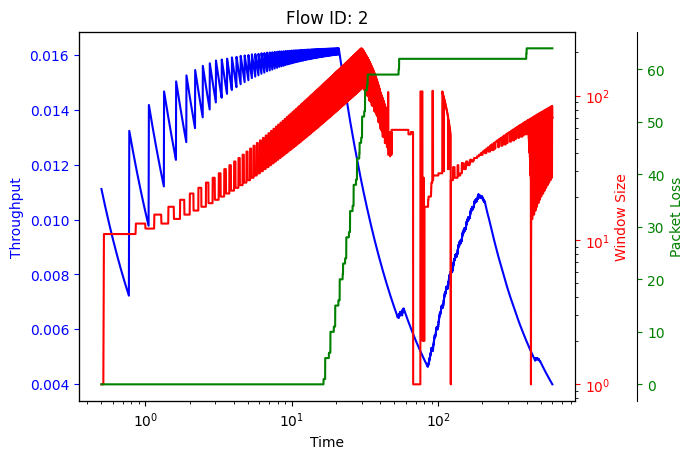

In [6]:
flow_ids = data['Flow ID'].unique()

for flow_id in flow_ids:
    flow_data = data[data['Flow ID'] == flow_id]

    time = flow_data['Time']
    throughput = flow_data['Throughput']
    window_size = flow_data['Window Size']
    packet_loss = flow_data['Packets Dropped']
    fairness = flow_data['Fairness']

    fig, ax1 = plt.subplots()
    ax1.title.set_text(f'Flow ID: {flow_id}')
    ax = [ax1]

    color = 'blue'
    ax[-1].plot(time, throughput, label=f'Flow ID: {flow_id}', color=color)
    ax[-1].set_xlabel('Time')
    ax[-1].set_ylabel('Throughput', color=color)
    ax[-1].tick_params('y', colors=color)

    generate_subplot(ax, flow_id, time, window_size, 'red', 'Window Size', 0, True)
    generate_subplot(ax, flow_id, time, packet_loss, 'green', 'Packet Loss', 45, False)
    # generate_subplot(ax, flow_id, time, fairness, 'orange', 'Fairness', 90, True)
    
    # Display the plot
    plt.show()
    plt.close()